In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Setting a random seed for reproducibility
np.random.seed(44)

# Number of data points
n = 100000

# Generating 2D data points uniformly distributed in the unit square
x = np.random.rand(n, 2)

p = 0.1
# Compute y based on the given condition
y = np.where(x[:, 0] - x[:, 1] > 0,
             np.random.binomial(1, p, n),
             np.random.binomial(1, 1-p, n))

# Generate test dataset
m = 100000
x_test = np.random.rand(m, 2)
y_test = np.where(x_test[:, 0] - x_test[:, 1] > 0,
                  np.random.binomial(1, p, m),
                  np.random.binomial(1, 1-p, m))


def plot_decision_tree(_depth=4,_training_size=10000,_draw=True):
  # train on a subset
  _x = x[:_training_size]
  _y = y[:_training_size]
  train_accuracy,test_accuracy = None,None

  # Train a decision tree of depth 4
  if _depth > 0:
    clf = DecisionTreeClassifier(max_depth=_depth)
    clf.fit(_x, _y)

    # Predictions
    y_train_pred = clf.predict(_x)
    y_test_pred = clf.predict(x_test)

    # Compute accuracies
    train_accuracy = accuracy_score(_y, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

  if _draw:
    # Adjusting the plot
    plt.figure(figsize=(10, 8))
    if _depth > 0:  # Plotting decision boundary
      xx, yy = np.meshgrid(np.linspace(0, 1, 500),
                          np.linspace(0, 1, 500))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      #plt.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")
      plt.contour(xx, yy, Z, colors="black", linewidths=0.5)
    plt.scatter(_x[_y == 0][:, 0], _x[_y == 0][:, 1], color='red', label='y=0', s=3, marker='.')
    plt.scatter(_x[_y == 1][:, 0], _x[_y == 1][:, 1], color='blue', label='y=1', s=3, marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training set and decision boundary of the decision tree')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
  return train_accuracy,test_accuracy


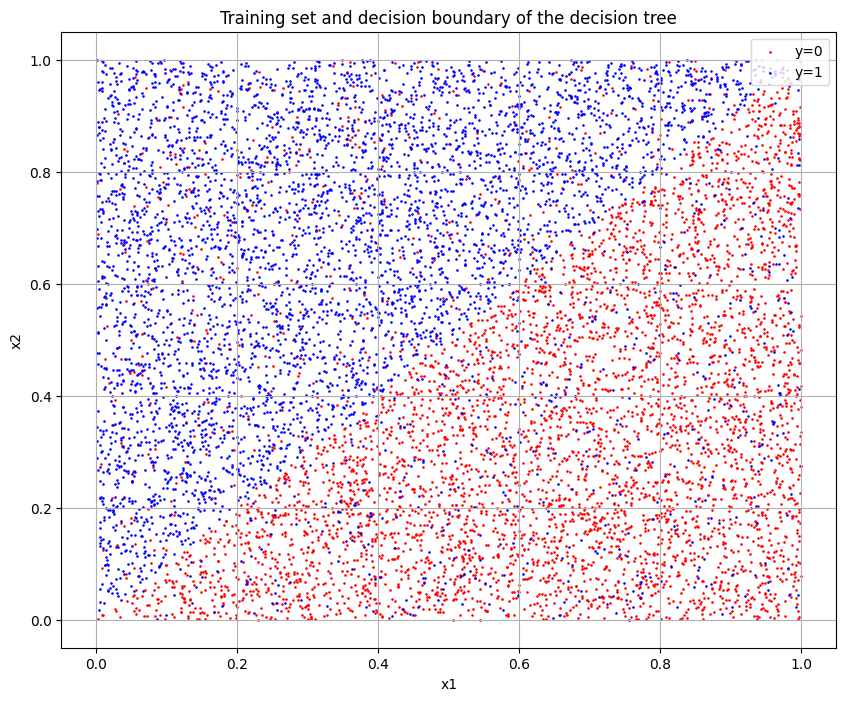

In [13]:
plot_decision_tree(0);

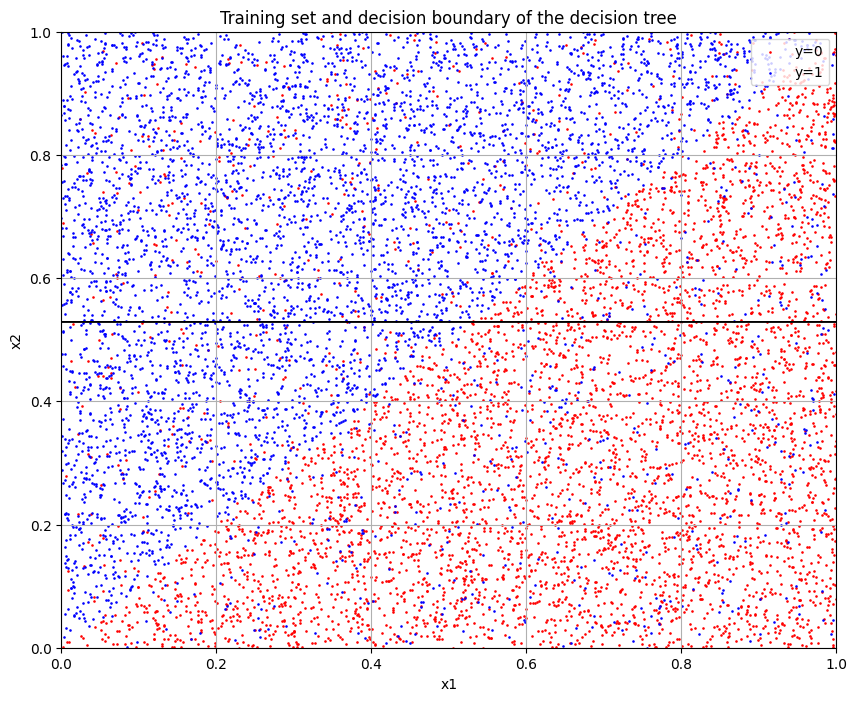

Depth  1 , Empirical Risk 0.2955 , True Risk 0.30186999999999997


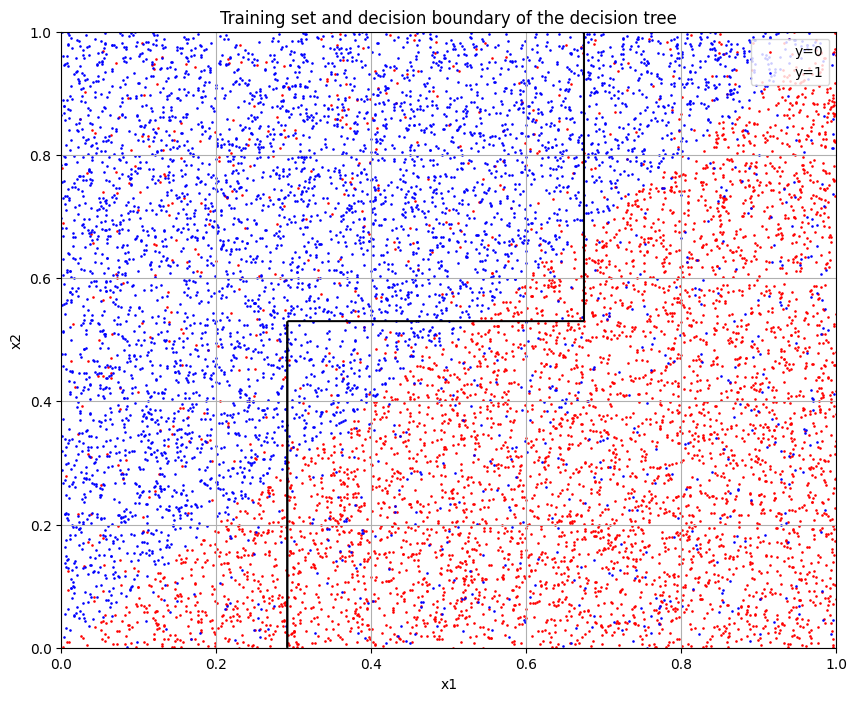

Depth  2 , Empirical Risk 0.20220000000000005 , True Risk 0.20752000000000004


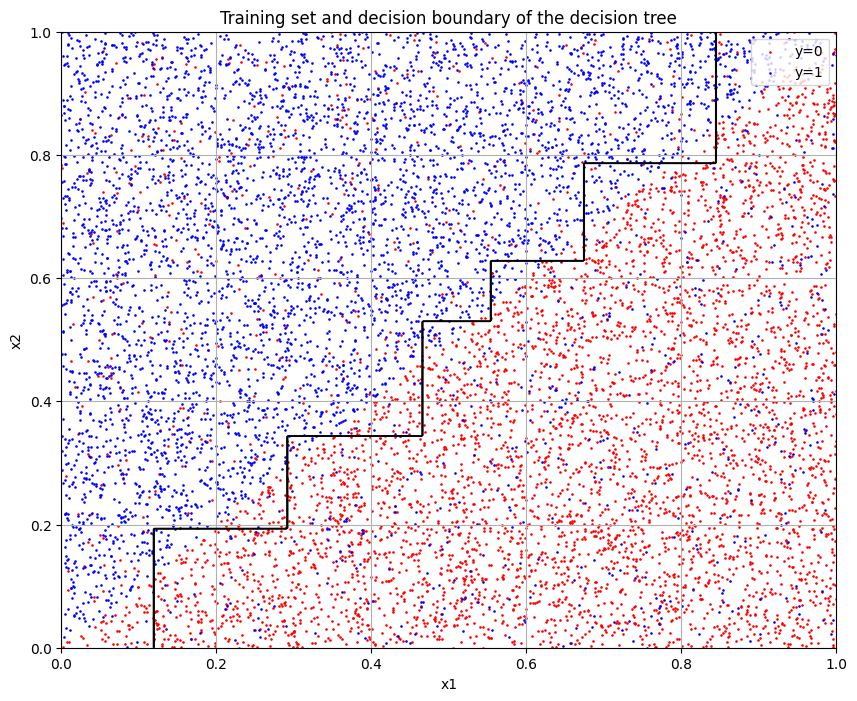

Depth  4 , Empirical Risk 0.13270000000000004 , True Risk 0.13849999999999996


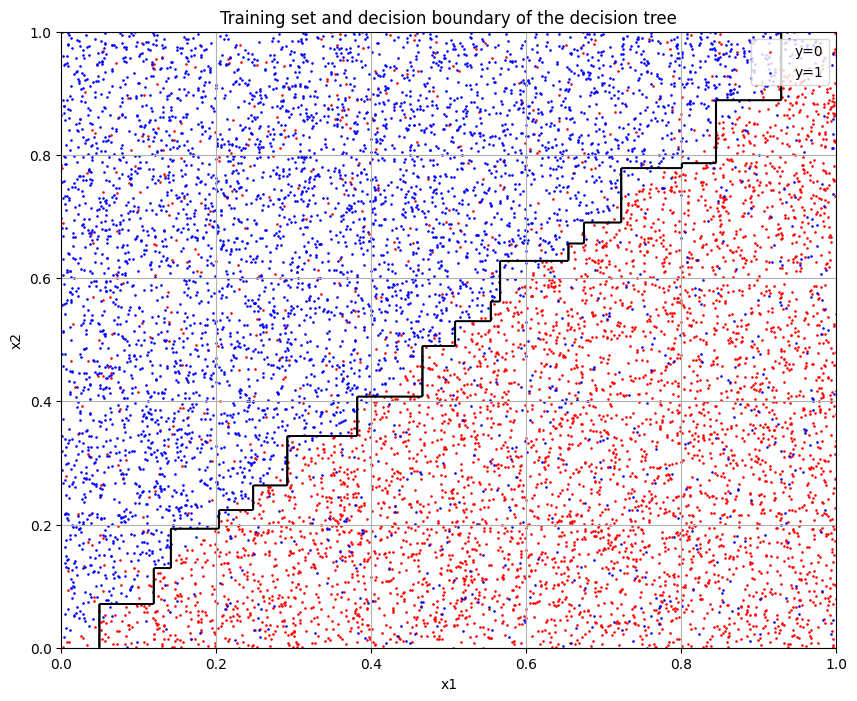

Depth  6 , Empirical Risk 0.1068 , True Risk 0.11689000000000005


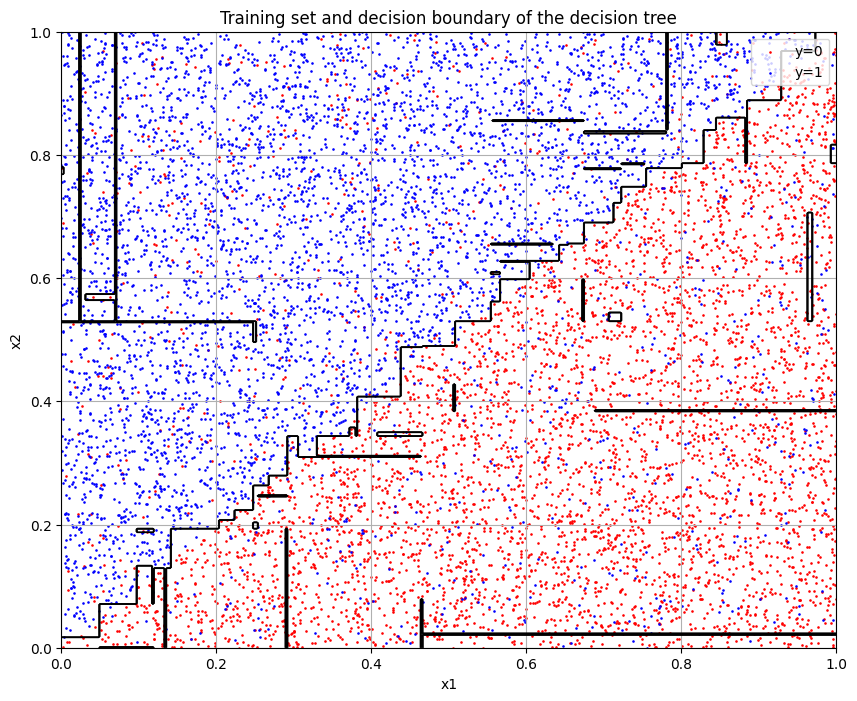

Depth  8 , Empirical Risk 0.09360000000000002 , True Risk 0.11846999999999996


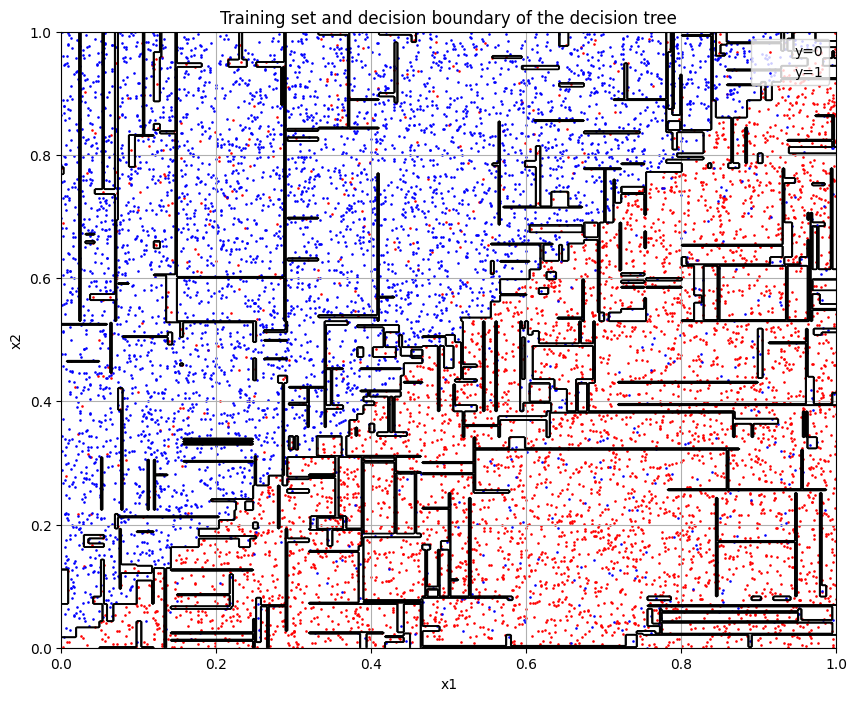

Depth  20 , Empirical Risk 0.029200000000000004 , True Risk 0.16325


In [14]:
for dpt in [1,2,4,6,8,20]:
  train_accuracy,test_accuracy = plot_decision_tree(dpt)
  print('Depth ',dpt,', Empirical Risk',1-train_accuracy,', True Risk', 1-test_accuracy)



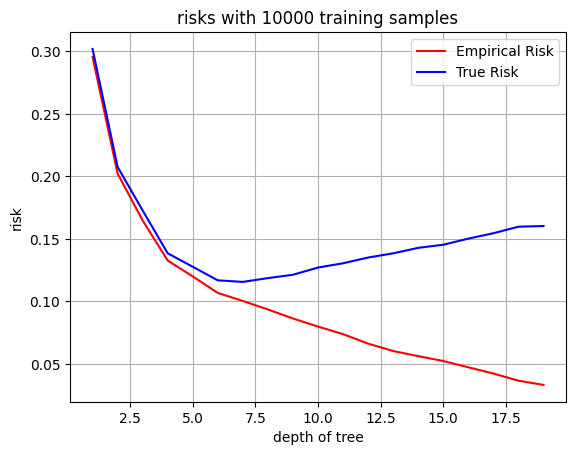

In [15]:

def plot_risks(_depths,_trainsetsize):
  risklist = np.array([plot_decision_tree(k,_trainsetsize,False) for k in _depths])

  plt.plot( depths,(1-risklist)[:,0],c='r' ,label = 'Empirical Risk')
  plt.plot( depths,(1-risklist)[:,1],c='b' ,label = 'True Risk')
  plt.grid()
  plt.xlabel('depth of tree')
  plt.ylabel('risk')
  plt.legend(loc='upper right')
  plt.title('risks with '+str(_trainsetsize)+' training samples')
depths = np.arange(1,20)
plot_risks(depths,10000)

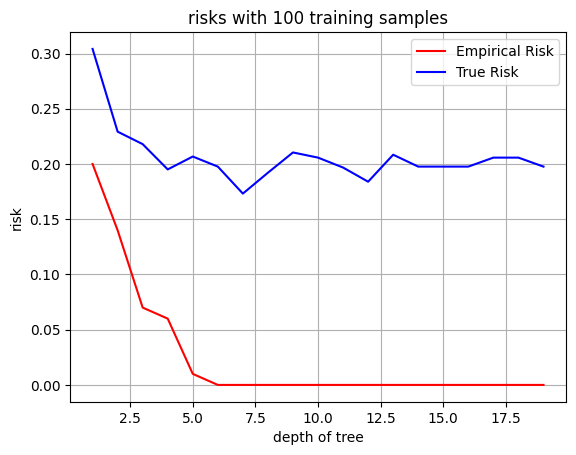

In [7]:
depths = np.arange(1,20)
plot_risks(depths,100)

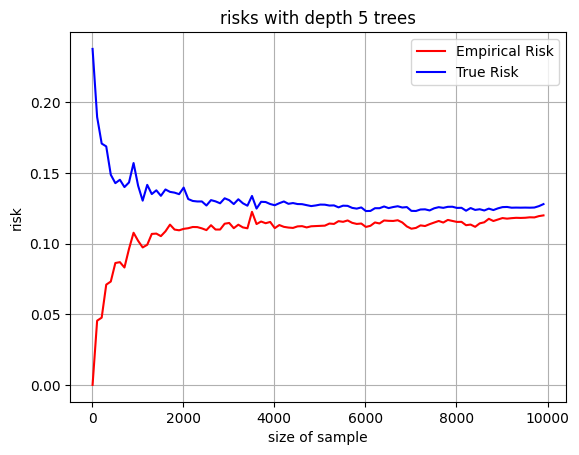

In [17]:

def plot_risks_vs_N():
  k = 5
  trainsetsizes = np.arange(10,10000,100)
  risklist = np.array([plot_decision_tree(k,_trainsetsize,False) for _trainsetsize in trainsetsizes])

  plt.plot( trainsetsizes,(1-risklist)[:,0],c='r' ,label = 'Empirical Risk')
  plt.plot( trainsetsizes,(1-risklist)[:,1],c='b' ,label = 'True Risk')
  plt.grid()
  plt.xlabel('size of sample')
  plt.ylabel('risk')
  plt.legend(loc='upper right')
  plt.title('risks with depth 5 trees')
plot_risks_vs_N()